# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf
import os
%matplotlib inline
from google.protobuf.json_format import MessageToJson
import tensorflow as tf
from utils import get_dataset
import io
import os
import argparse
import logging

import tensorflow.compat.v1 as tf
from PIL import Image
from waymo_open_dataset import dataset_pb2 as open_dataset
import glob
import json
import os

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

In [2]:
dataset = get_dataset("/home/workspace/data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:
def display_images(dataset):
    # TODO - Your implementation here
    """
    create a grid visualization of images with color coded bboxes
    args:
    - ground_truth [list[dict]]: ground truth data
    """
    count = 0
    #paths = glob.glob('data/images/*')
    for idx,data in enumerate(dataset):
        #print(data)
        # mapping to access data faster
        #gtdic = {}

        #gtdic[data['filename']] = data['filename']

        # color mapping of classes
        colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}

        f, ax = plt.subplots()
        #filename = os.path.basename(paths[i])
        img = data['image']
        ax.imshow(img)
        
        bboxes = data['groundtruth_boxes']
        classes = data['groundtruth_classes']
        for cl, bb in zip(classes, bboxes):
            bb = bb.numpy() 
            bb = bb * data['image'].shape[0]
            #print(bb)
            y1, x1, y2, x2 = bb
            rec = Rectangle((x1, y1), x2- x1, y2-y1, facecolor='none', 
                            edgecolor=colormap[cl.numpy()])
            #print(rec)
            ax.add_patch(rec)
        ax.axis('off')
        plt.tight_layout()
        plt.show()
        
        count += 1
        if count == 10:
            break

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

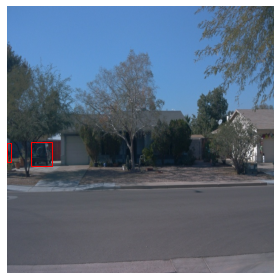

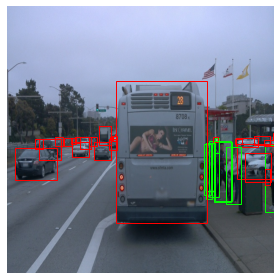

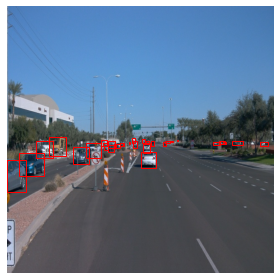

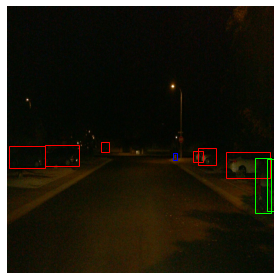

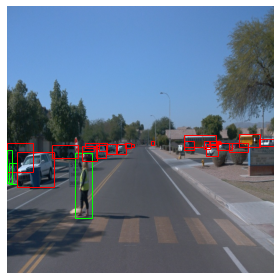

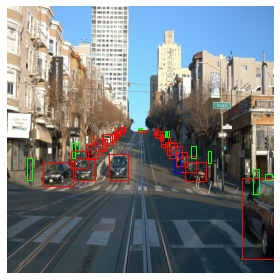

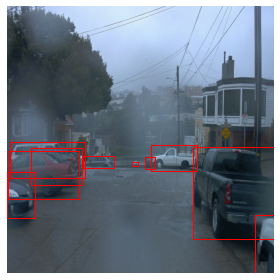

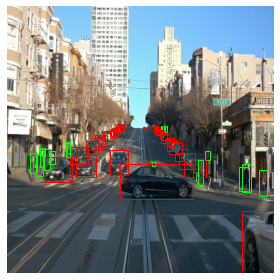

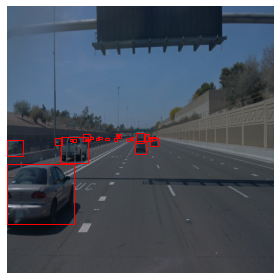

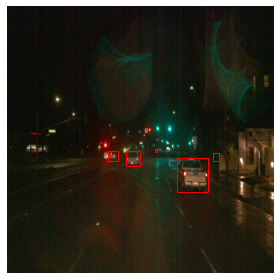

In [4]:
# Display 10 random images in dataset
display_images(dataset)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [5]:
import numpy as np

In [6]:
for idx,data in enumerate(dataset):
    classes = data['groundtruth_classes'].numpy()
    cls, counts = np.unique(classes, return_counts=True)
    break

In [9]:
(cls==4).sum()

0

In [16]:
mean = []
stand_dev = []
class_dist_1 = 0 
class_dist_2 = 0
class_dist_4 = 0
for idx,data in enumerate(dataset):
    classes = data['groundtruth_classes'].numpy()
    cls, counts = np.unique(classes, return_counts=True)
    mean.append(np.mean(data['image'].numpy()))
    stand_dev.append(np.std(data['image']))
    #class_dist.append(dict(zip(cls,counts)))
    #print(cls)
    if (cls==1).sum() != 0:
        class_dist_1+=1
    if (cls==2).sum() != 0:
        class_dist_2+=1
    if (cls==4).sum() != 0:
        class_dist_4+=1
    
    # calculate class distribution
    if idx == 10000:
        break

In [17]:
print("Ratio of class 1:4:6 is "+ str(class_dist_1/(class_dist_1+class_dist_2+class_dist_4)) +' : ' +str(class_dist_2/(class_dist_1+class_dist_2+class_dist_4))+ ' : ' +str(class_dist_4/(class_dist_1+class_dist_2+class_dist_4)))

Ratio of class 1:4:6 is 0.6160651323802808 : 0.32386691454580424 : 0.06006795307391499


In [18]:
np.std(np.array(stand_dev))

14.814035260341141